# Presentation

This notebook is used for generating figures for the presentation of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ddro import pg, solvers, benchmark
import os

FIGURE_DIR = os.path.join("..", "doc", "figure")

We create a toy example to introduce the public to the problem.

In [2]:
# Reproducibility
np.random.seed(1234)

# Limits of the space
x_lim = (-10, 10)
y_lim = (-10, 10)
num_fac = 10
num_cs = 20
fac_pos = np.stack(
    (
        np.random.uniform(x_lim[0], x_lim[1], num_fac),
        np.random.uniform(y_lim[0], y_lim[1], num_fac),
    ),
    axis=1,
)
cs_pos = np.stack(
    (
        np.random.uniform(x_lim[0], x_lim[1], num_cs),
        np.random.uniform(y_lim[0], y_lim[1], num_cs),
    ),
    axis=1,
)
dd_sup = np.arange(1, 101)  # Demand support
cs_oc = np.random.uniform(5000, 10000, size=num_fac)
fac_cap = np.random.uniform(10, 50, size=num_fac)  # Facility capacities
cs_rev = np.random.normal(150, 10, num_cs)  # Costumer site revenues
cs_pen = np.repeat(250, num_cs)  # Costumer site penalties
t_factor = np.random.uniform(
    2, 3, size=(num_fac, num_cs)
)  # Transportation factor
dist = lambda x, y: np.linalg.norm(x - y)  # L2 distance
## Compute the distances between facilities and costumer sites
## and compute the transportation costs
t_costs = np.empty_like(t_factor)
for i in range(num_fac):
    for j in range(num_cs):
        t_costs[i, j] = t_factor[i, j] * dist(fac_pos[i], cs_pos[j])

flp = pg.FLP(
    nf=num_fac,
    nc=num_cs,
    sd=dd_sup,
    oc=cs_oc,
    tc=t_costs,
    cf=fac_cap,
    rc=cs_rev,
    pc=cs_pen,
)

/tmp/ipykernel_13614/1140362598.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


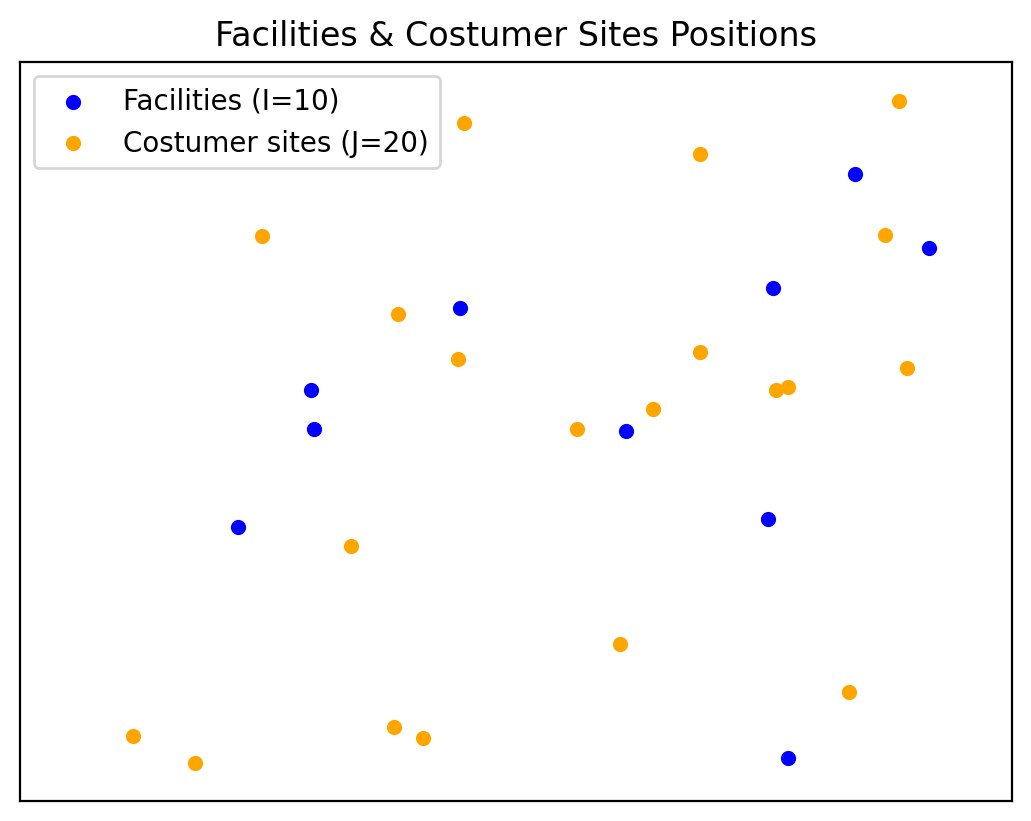

In [3]:
# Plot facility and costumer site positions
fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.set_title("Facilities & Costumer Sites Positions")
ax.set_xlim(-11, 11)
ax.set_ylim(-11, 11)
# ax.grid(visible=True)
ax.scatter(
    fac_pos[:, 0],
    fac_pos[:, 1],
    c="blue",
    marker="o",
    s=20,
    label=f"Facilities (I={num_fac})",
)
ax.scatter(
    cs_pos[:, 0],
    cs_pos[:, 1],
    c="orange",
    marker="o",
    s=20,
    label=f"Costumer sites (J={num_cs})",
)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.legend()
fig.savefig(os.path.join(FIGURE_DIR, "facility_costumer_site_pos.png"))
fig.show()

In [4]:
bas_solver = solvers.BASSolver(nf=flp.nf, nc=flp.nc)
dr_solver = solvers.DRSolver(nf=flp.nf, nc=flp.nc)
p_solver = solvers.PSolver()

In [5]:
bas_solver.solve(flp)
dr_solver.solve(flp)
p_solver.solve(flp)

Set parameter Username
Set parameter LicenseID to value 2588513
Academic license - for non-commercial use only - expires 2025-11-21
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: Intel(R) Core(TM) i5-8300H CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 65540 rows, 5030 columns and 386220 nonzeros
Model fingerprint: 0x76702b9d
Variable types: 5020 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [3e-02, 2e+05]
  Objective range  [6e-01, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+05]
Presolve removed 38569 rows and 2263 columns
Presolve time: 1.01s
Presolved: 26971 rows, 2767 columns, 323051 nonzeros
Variable types: 2757 continuous, 10 integer (10 binary)
Found heuristic solution: objective -50982.35436
Root rel

True

/tmp/ipykernel_13614/4278524827.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


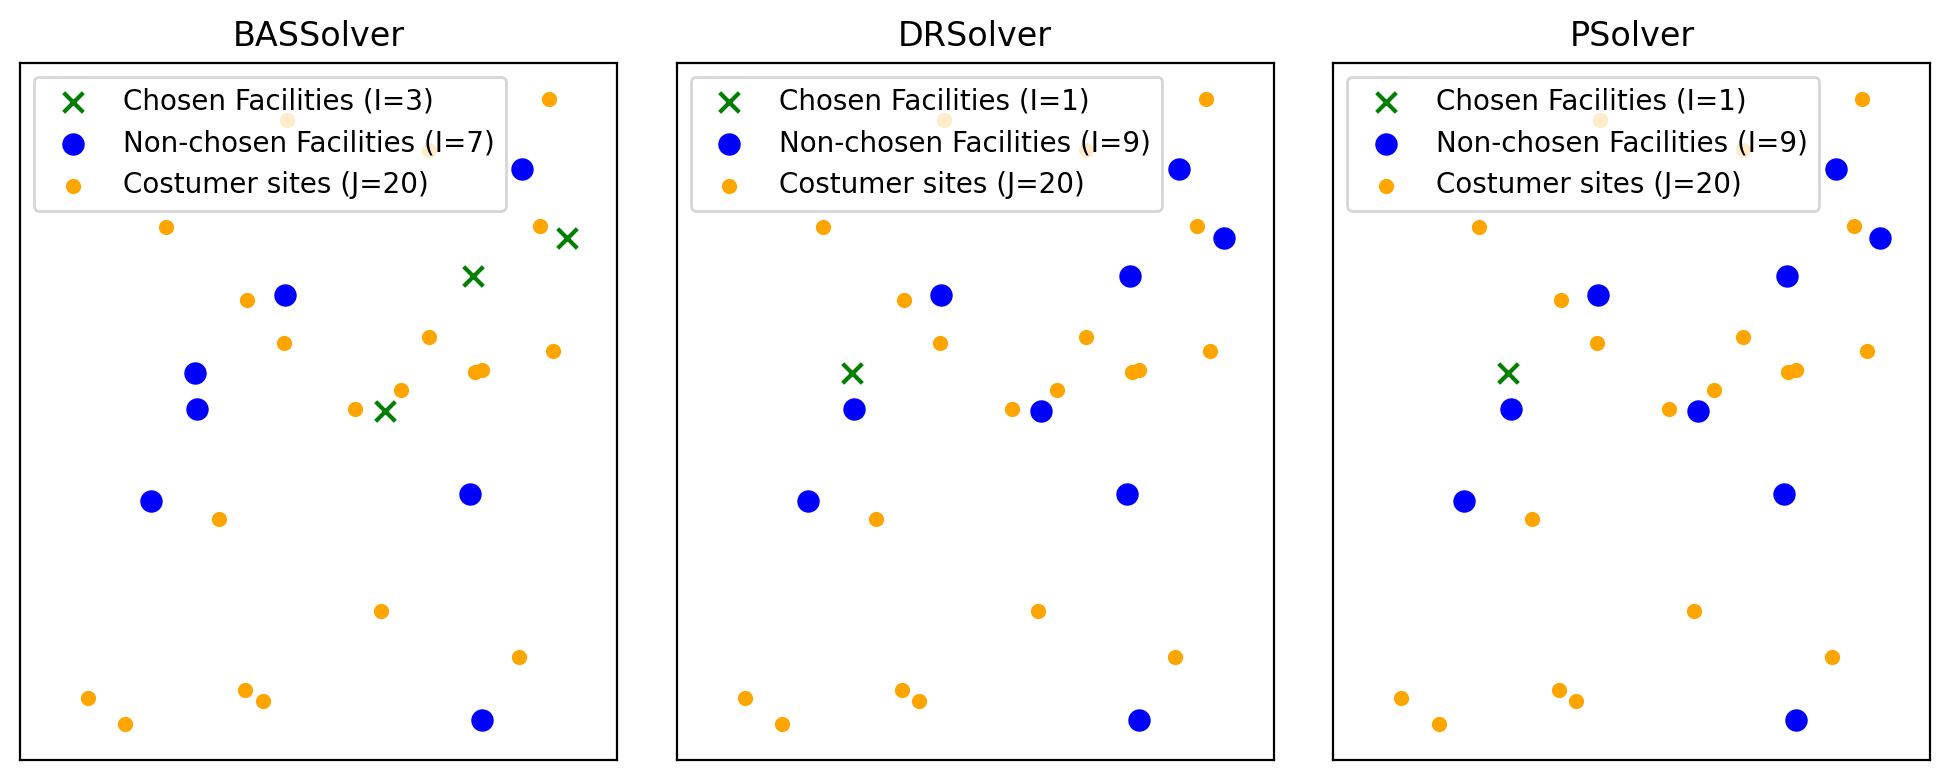

In [6]:
# Plot chosen facilities and costumer site
def print_chosen_on_ax(ax, mask):
    nmask = ~mask
    ax.set_title("Chosen Facilities & Costumer Sites")
    ax.set_xlim(-11, 11)
    ax.set_ylim(-11, 11)
    ax.scatter(
        fac_pos[mask, 0],
        fac_pos[mask, 1],
        c="green",
        marker="x",
        s=50,
        label=f"Chosen Facilities (I={mask.sum()})",
    )
    ax.scatter(
        fac_pos[nmask, 0],
        fac_pos[nmask, 1],
        c="blue",
        marker="o",
        s=50,
        label=f"Non-chosen Facilities (I={nmask.sum()})",
    )
    ax.scatter(
        cs_pos[:, 0],
        cs_pos[:, 1],
        c="orange",
        marker="o",
        s=20,
        label=f"Costumer sites (J={num_cs})",
    )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.legend()


fig = plt.figure(dpi=200, figsize=(10, 4))

bas_ax = fig.add_subplot(1, 3, 1)
bas_chosen_mask = bas_solver.y.astype(bool)
print_chosen_on_ax(bas_ax, bas_chosen_mask)
dr_ax = fig.add_subplot(1, 3, 2)
dr_chosen_mask = dr_solver.y.astype(bool)
print_chosen_on_ax(dr_ax, dr_chosen_mask)
p_ax = fig.add_subplot(1, 3, 3)
p_chosen_mask = p_solver.y.astype(bool)
print_chosen_on_ax(p_ax, p_chosen_mask)
bas_ax.set_title("BASSolver")
dr_ax.set_title("DRSolver")
p_ax.set_title("PSolver")

fig.tight_layout()

fig.savefig(os.path.join(FIGURE_DIR, "chosen_facility_costumer_site_pos.png"))
fig.show()

In [7]:
ys = [bas_solver.y, dr_solver.y, p_solver.y]
N = 250
objs, ss = benchmark.benchmark(ys, flp, N=N)

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: Intel(R) Core(TM) i5-8300H CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 110000 rows, 55000 columns and 160000 nonzeros
Model fingerprint: 0xc9c502df
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 108644 rows and 49688 columns
Presolve time: 0.04s
Presolved: 1356 rows, 5312 columns, 5312 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 5.060e+02 (roughly 1 MB of memory)
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.05 seconds (0.05 work units)
Barrier solve interrupted - model solved b

/tmp/ipykernel_13614/1518606089.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


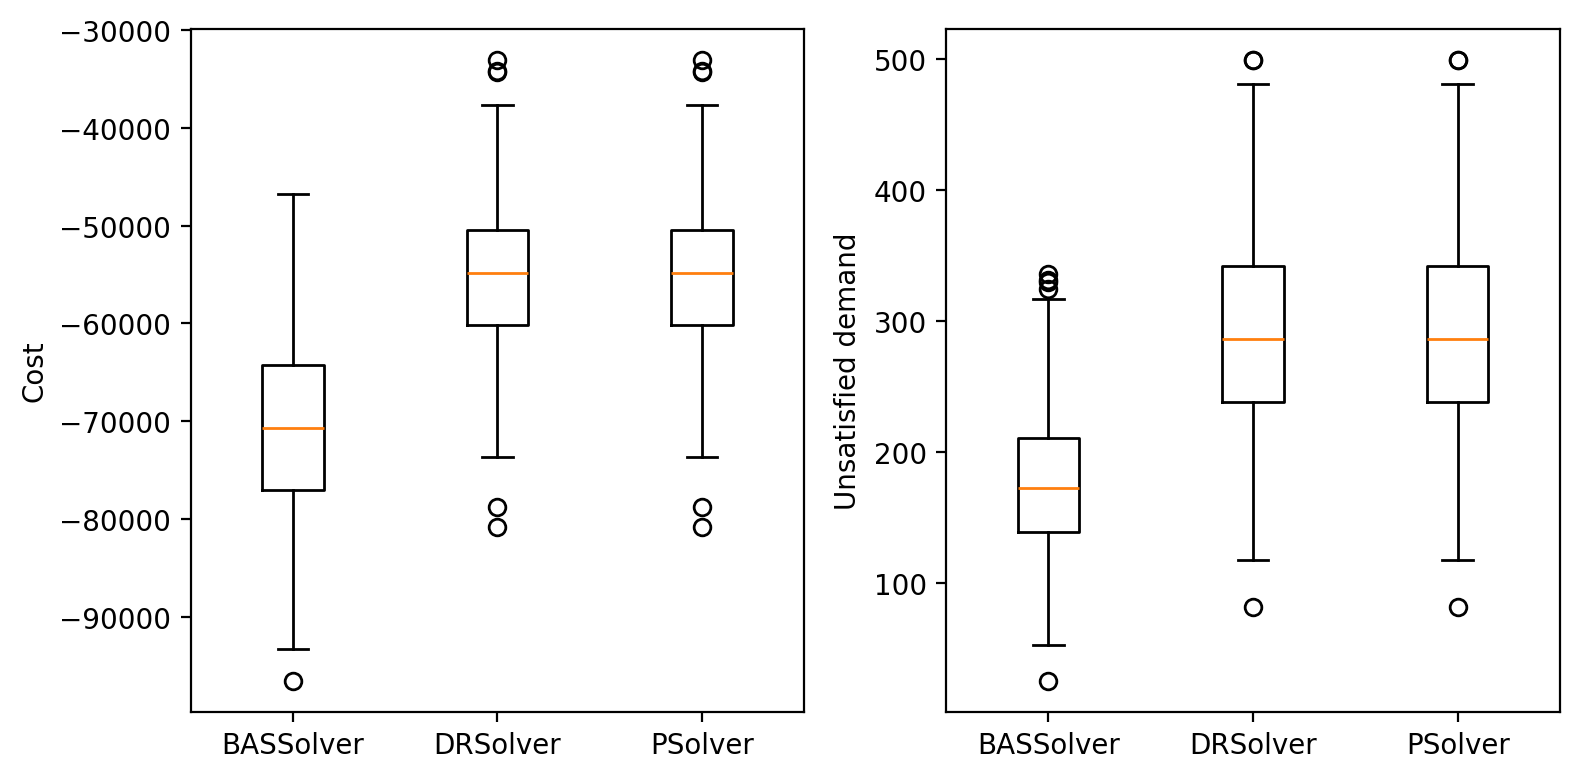

In [8]:
fig = plt.figure(dpi=200, figsize=(8, 4))
axl = fig.add_subplot(1, 2, 1)
axr = fig.add_subplot(1, 2, 2)
labels = ["BASSolver", "DRSolver", "PSolver"]
axl.boxplot(
    x=objs,
    tick_labels=labels,
)
axl.set_ylabel("Cost")
axr.boxplot(x=ss, tick_labels=labels)
axr.set_ylabel("Unsatisfied demand")
fig.tight_layout()
fig.savefig(os.path.join(FIGURE_DIR, "benchmark.png"))
fig.show()